# 2. CNN

## Sequential API

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

num_labels=len(np.unique(y_train))

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

shape1=x_train.shape[1]
shape2=x_train.shape[2]

x_train=x_train.reshape(-1, shape1,shape2,1)
x_test=x_test.reshape(-1, shape1,shape2,1)

x_train=x_train/255.
x_test=x_test/255.

#표본수를 포함하여 4D 텐서이므로 입력은 3D 텐서가 된다.
input_shape=(shape1,shape2,1)
batch_size=64
kernel_size=3 # (3,3) 해도 같음
pool_size=2 # (2,2)
filters=64
dropout=0.3

In [5]:
model=Sequential()
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [3]:
model=Sequential()
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,kernel_size=kernel_size,activation='relu'))
model.add(Flatten())
model.add(Dropout(dropout))
model.add(Dense(num_labels, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

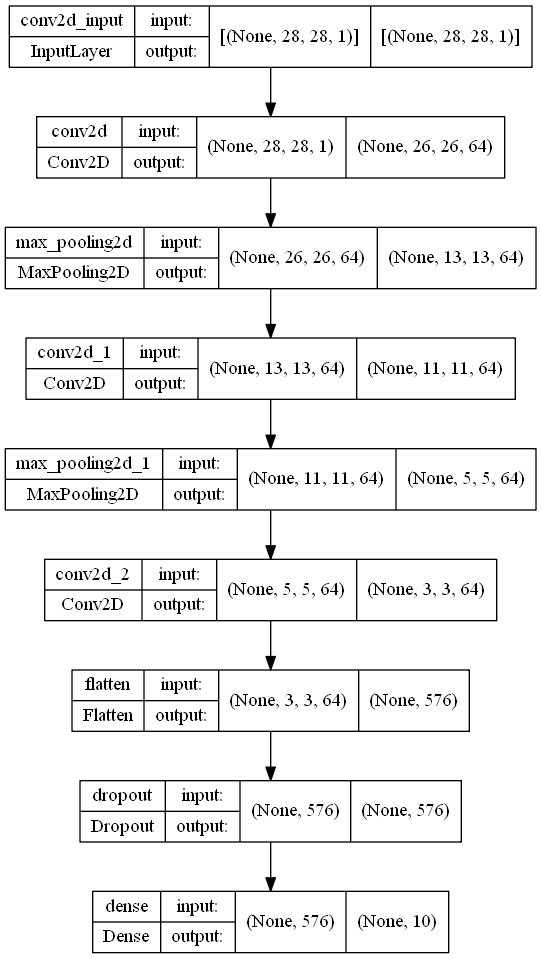

In [4]:
plot_model(model,show_shapes=True)

In [5]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
938/938 [==============================] - 22s 23ms/step - loss: 0.4635 - accuracy: 0.8533
Epoch 2/10
938/938 [==============================] - 26s 27ms/step - loss: 0.0652 - accuracy: 0.9790
Epoch 3/10
938/938 [==============================] - 26s 28ms/step - loss: 0.0463 - accuracy: 0.9857
Epoch 4/10
938/938 [==============================] - 27s 29ms/step - loss: 0.0338 - accuracy: 0.9883
Epoch 5/10
938/938 [==============================] - 28s 30ms/step - loss: 0.0311 - accuracy: 0.9902
Epoch 6/10
938/938 [==============================] - 34s 37ms/step - loss: 0.0238 - accuracy: 0.9927
Epoch 7/10
938/938 [==============================] - 44s 47ms/step - loss: 0.0213 - accuracy: 0.9932
Epoch 8/10
938/938 [==============================] - 44s 47ms/step - loss: 0.0166 - accuracy: 0.9940
Epoch 9/10
938/938 [==============================] - 33s 35ms/step - loss: 0.0181 - accuracy: 0.9943
Epoch 10/10
938/938 [==============================] - 43s 45ms/step - loss: 0.013

In [6]:
results=model.evaluate(x_test,y_test, batch_size=32)
print(results)

313/313 [==============================] - 1s 4ms/step - loss: 0.0266 - accuracy: 0.9912
[0.026592880487442017, 0.9911999702453613]


## functional API

In [7]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
x=Input(shape=input_shape)
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(x)
h=MaxPooling2D()(h) #maxpooling2D의 default는 (2,2)임
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(h)
h=MaxPooling2D()(h) #maxpooling2D의 default는 (2,2)임
h=Conv2D(filters=filters,kernel_size=kernel_size,activation='relu')(h)
h=Flatten()(h)
h=Dropout(dropout)(h)
out=Dense(num_labels,activation='softmax')(h)
model=Model(inputs=x,outputs=out)
model.summary()

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=64)
score=model.evaluate(x_test,y_test)
print(score)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928 